REGRESIÓN LINEAL SIMPLE

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
 data = pd.read_csv('/content/sample_data/Ventaxpublicidad.csv')
 data.head()

,Unnamed: 0,youtube,facebook,radio,ventas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
data = data.iloc[:, 1:]
data.head()

,youtube,facebook,radio,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   youtube   200 non-null    float64
 1   facebook  200 non-null    float64
 2   radio     200 non-null    float64
 3   ventas    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,youtube,facebook,radio,ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.columns

Index(['youtube', 'facebook', 'radio', 'ventas'], dtype='object')

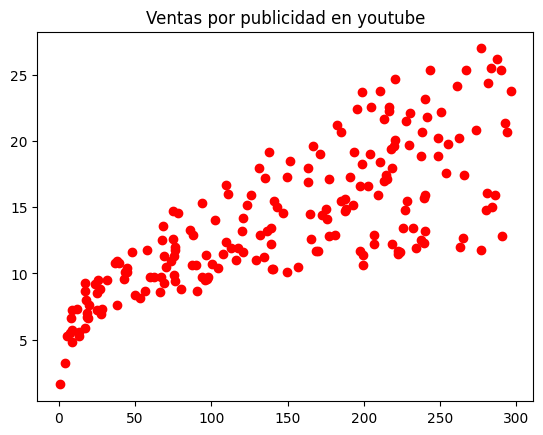

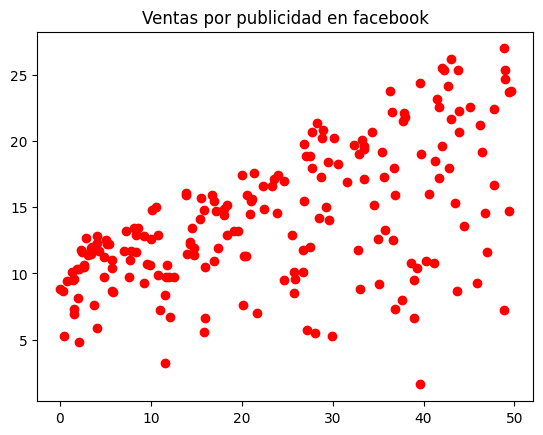

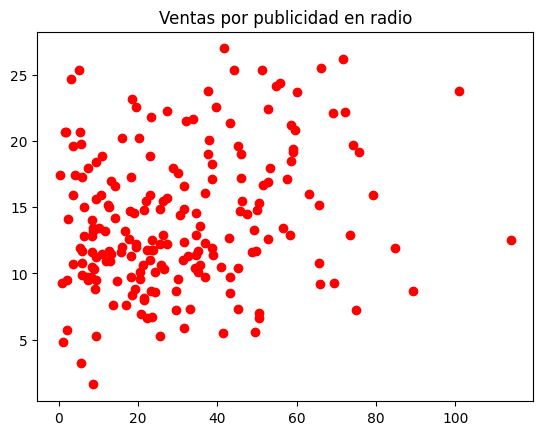

In [ ]:
cols = ['youtube', 'facebook', 'radio']
for col in cols:
  plt.plot(data[col], data['ventas'], 'ro')
  plt.title('Ventas por publicidad en %s' % col)
  plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
X = data['youtube'].values.reshape(-1, 1)
y = data['ventas'].values

CONJUNTO DE DATOS PARA ENTRENAMIENTO Y PRUEBA

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [25]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = line_reg.predict(X_test)
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [28]:
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3]


In [29]:
from sklearn.metrics import mean_squared_error # Import the necessary function

r_squared = line_reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False) # Now this line will work correctly
print(r_squared, rmse)


0.6766954295627076 3.194472431998898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
from sklearn.metrics import r2_score # Import the r2_score function

r2_score(y_test, y_pred)

0.6766954295627076

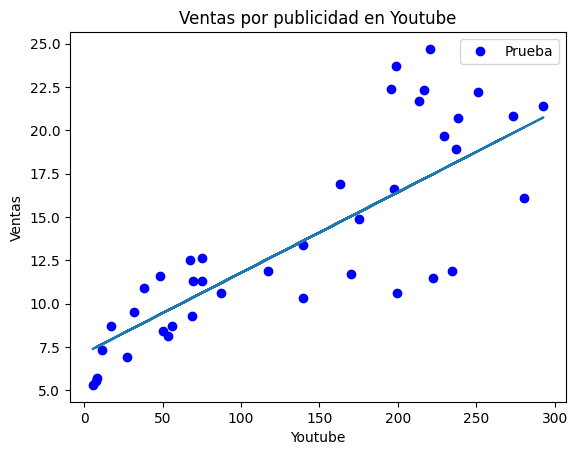

In [32]:
plt.plot(X_test, y_test, 'bo', label='Prueba')
plt.plot(X_test, y_pred.reshape(-1, 1))
plt.xlabel('Youtube')
plt.ylabel('Ventas')
plt.title('Ventas por publicidad en Youtube')
plt.legend()
plt.show()